# Estadística descriptiva:

## Variables numéricas:

    - Tpos:
        - Continua -> puede tomar valores infinitos dentro de un rango (80.23, 81.34, 81.37) -> velocidad
        - Discretas -> toman un valor determnado dentro un rango (1,2,3,4,5) -> num. habitaciones

    - Medidas de centralización:
        - Media
        - Mediana
        - Moda -> para variables continuas no se usa mucho, para variables discretas sí es representativa
    - Medidas de dispersión:
        - Varianza
        - Desviación -> está en las mismas unidades que la variable. Mucho más sencilla de interpretar
    - Medidas de correlación:
        - Para saber qué tipo tango que hacer(Pearson o Spearman), hago ambas. Si hay deferencia entre los valores, me quedo con Spearman (no hay linealidad o hay muchos outliers), si los valores son parecedidos (me puedo quedar con Parson y asumir linealidad y que notengo valores extremos que afecten )
        - Es recomendable hacer un scatterplot para ver la relación.
    - Medidas de posición:
        - Cuartiles
        

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("files/bank.csv", index_col=0)
df.head(1)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857,4.4


In [8]:
media = df["age"].mean()
mediana = df["age"].median()

print(f"la media es {media} y la mediana es {mediana}")

la media es 39.98804013098316 y la mediana es 39.95594581951044


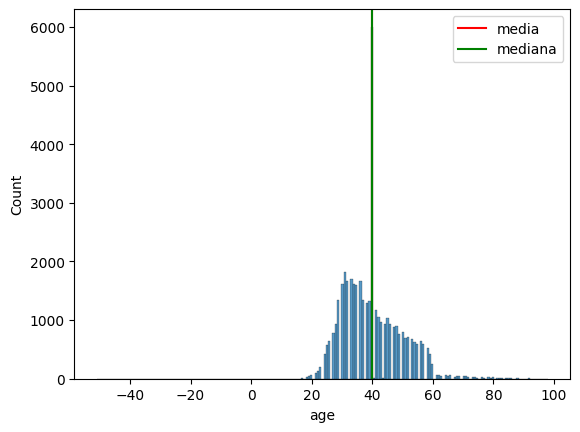

In [11]:
sns.histplot(x="age", data= df)
plt.axvline(media, color="red", label= "media")
plt.axvline(df["age"].median(), color="green", label= "mediana")
plt.legend()

In [15]:
df_corr = df.corr(numeric_only=True, method="pearson") # por defecto hace Pearson
df_corr

,income,kidhome,teenhome,numwebvisitsmonth,duration,campaign,previous,empvarrate,conspriceidx,consconfidx,latitude,longitude,contact_year,age,euribor3m,pdays
income,1.000000,0.001350,0.006480,0.002500,-0.002761,-0.003736,-0.003207,-0.008640,-0.011102,0.001571,-0.004433,0.000360,-0.003660,0.001155,-0.004221,0.008985
kidhome,0.001350,1.000000,-0.001352,-0.005629,-0.000759,-0.006733,-0.000851,-0.004026,0.001129,-0.002109,-0.002123,0.002349,-0.006110,0.001143,-0.005811,0.007374
teenhome,0.006480,-0.001352,1.000000,-0.002803,-0.005937,0.000802,-0.003012,0.001431,0.004037,0.000989,-0.001514,-0.001410,-0.012731,-0.001151,-0.000213,-0.000678
numwebvisitsmonth,0.002500,-0.005629,-0.002803,1.000000,0.000750,0.004470,-0.001967,-0.006914,-0.004197,0.006740,0.002851,-0.002244,0.006015,-0.004294,-0.004435,0.000028
duration,-0.002761,-0.000759,-0.005937,0.000750,1.000000,-0.071956,0.021285,-0.027158,0.005825,-0.007631,-0.004131,0.003563,-0.002421,-0.000744,-0.033776,-0.001628
campaign,-0.003736,-0.006733,0.000802,0.004470,-0.071956,1.000000,-0.079603,0.152084,0.127981,-0.012867,-0.009589,-0.000568,-0.005429,0.003961,0.123716,-0.001138
previous,-0.003207,-0.000851,-0.003012,-0.001967,0.021285,-0.079603,1.000000,-0.419110,-0.199708,-0.048914,0.011632,-0.010392,0.000837,0.027596,-0.431478,0.004409
empvarrate,-0.008640,-0.004026,0.001431,-0.006914,-0.027158,0.152084,-0.419110,1.000000,0.771397,0.192004,-0.008496,0.000301,0.003914,-0.004917,0.858271,-0.034251
conspriceidx,-0.011102,0.001129,0.004037,-0.004197,0.005825,0.127981,-0.199708,0.771397,1.000000,0.055530,-0.004180,-0.003114,0.008587,-0.001555,0.594990,-0.029937
consconfidx,0.001571,-0.002109,0.000989,0.006740,-0.007631,-0.012867,-0.048914,0.192004,0.055530,1.000000,-0.006520,0.007739,-0.004032,0.121770,0.234470,-0.040640


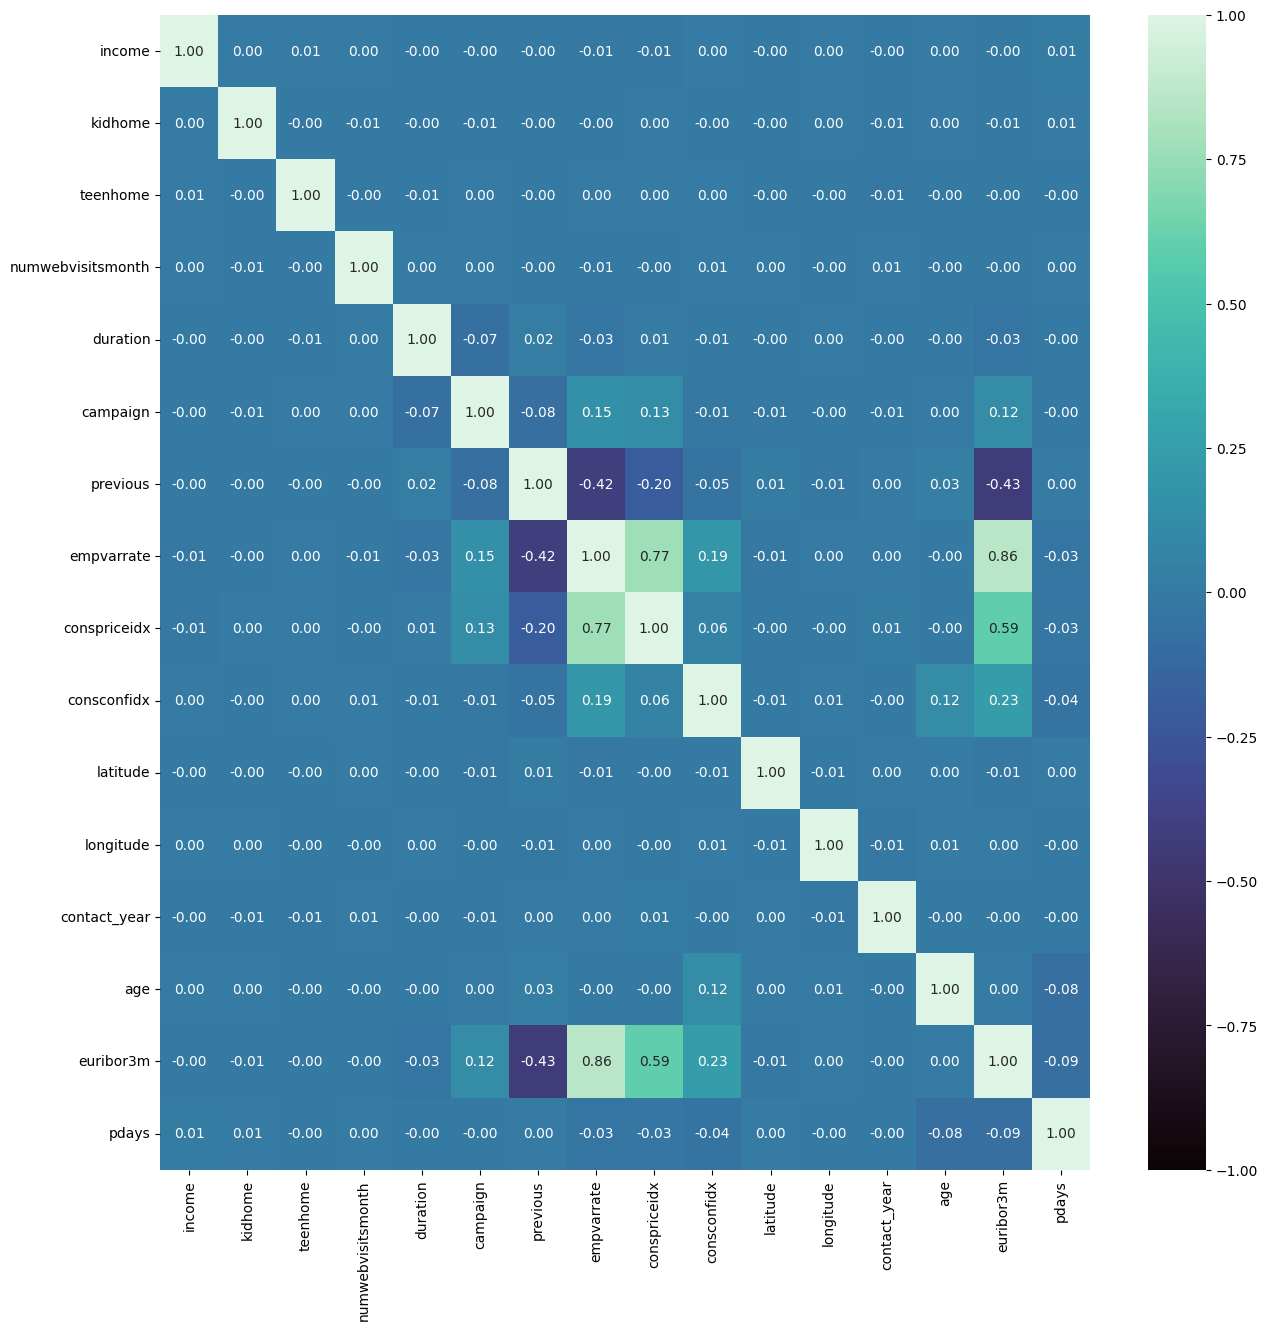

In [16]:
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_corr, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

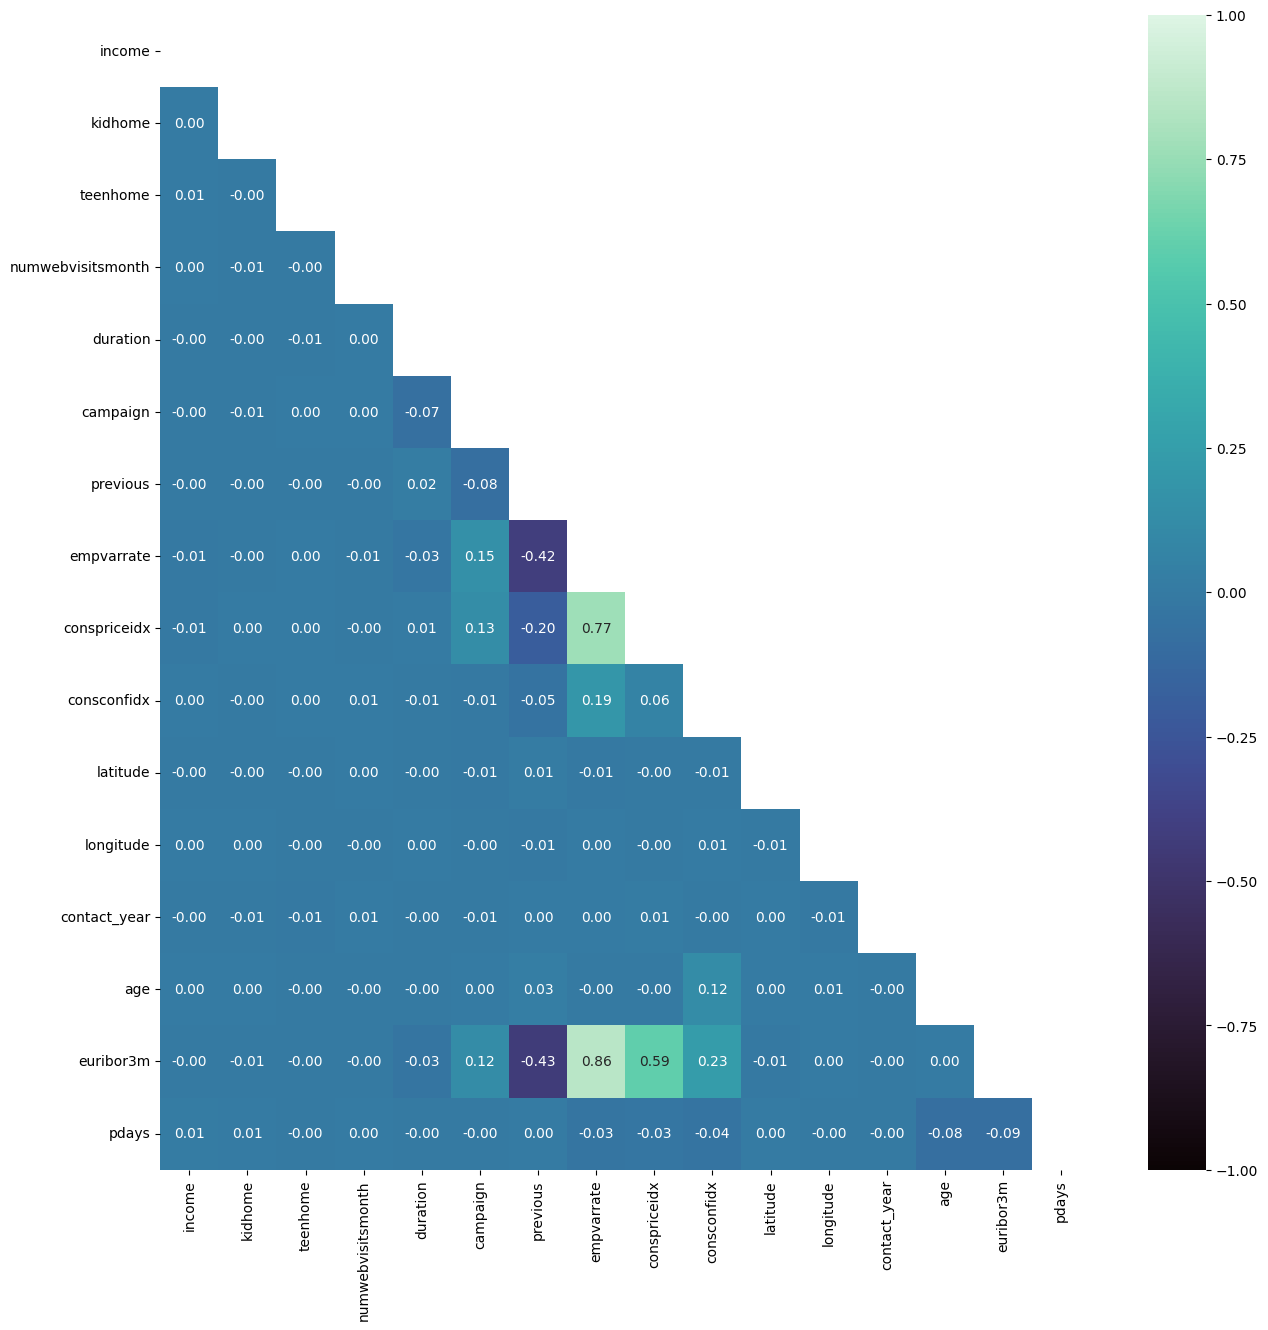

In [19]:
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [18]:
df.columns

Index(['income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth',
       'id', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'previous', 'poutcome', 'empvarrate',
       'conspriceidx', 'consconfidx', 'nremployed', 'y', 'date', 'latitude',
       'longitude', 'contact_month', 'contact_year', 'age_cat', 'age',
       'euribor3m', 'pdays'],
      dtype='object')

<Axes: xlabel='empvarrate', ylabel='euribor3m'>

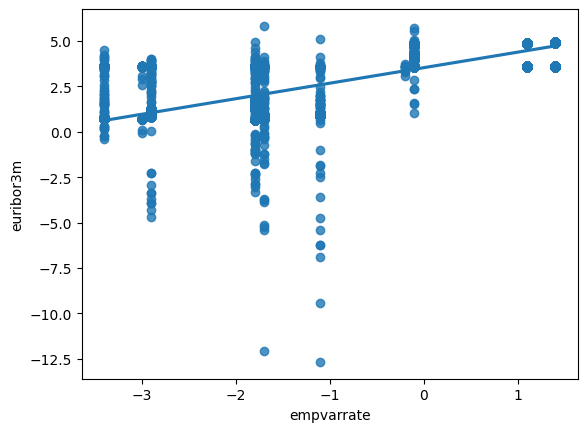

In [22]:
sns.regplot(y= "euribor3m", x= "empvarrate", data= df)

In [24]:
df_correlaciones = df.corr(numeric_only=True,  method = "spearman")
df_correlaciones

,income,kidhome,teenhome,numwebvisitsmonth,duration,campaign,previous,empvarrate,conspriceidx,consconfidx,latitude,longitude,contact_year,age,euribor3m,pdays
income,1.000000,0.001324,0.006487,0.002504,0.000232,0.006174,0.000933,-0.006900,-0.011501,0.000356,-0.004433,0.000374,-0.003602,0.003490,-0.001756,0.009223
kidhome,0.001324,1.000000,-0.001353,-0.005612,-0.003467,0.003005,-0.003948,-0.003666,0.001631,-0.004570,-0.002130,0.002334,-0.006232,0.000136,-0.002849,0.009427
teenhome,0.006487,-0.001353,1.000000,-0.002801,-0.002008,0.001433,0.000582,0.000864,0.004161,0.000331,-0.001550,-0.001425,-0.012767,0.000332,-0.003539,-0.000169
numwebvisitsmonth,0.002504,-0.005612,-0.002801,1.000000,0.008602,0.003152,-0.002181,-0.007394,-0.003013,0.006337,0.002823,-0.002216,0.005978,-0.006298,-0.005031,0.000651
duration,0.000232,-0.003467,-0.002008,0.008602,1.000000,-0.080843,0.043158,-0.068606,0.003272,-0.007817,-0.002437,0.002615,-0.004096,-0.001591,-0.069951,0.000917
campaign,0.006174,0.003005,0.001433,0.003152,-0.080843,1.000000,-0.088285,0.156665,0.098177,-0.000443,-0.005869,0.002948,-0.003064,0.005609,0.118690,0.007516
previous,0.000933,-0.003948,0.000582,-0.002181,0.043158,-0.088285,1.000000,-0.434810,-0.279919,-0.113894,0.012975,-0.010237,-0.000743,-0.014826,-0.420971,-0.003728
empvarrate,-0.006900,-0.003666,0.000864,-0.007394,-0.068606,0.156665,-0.434810,1.000000,0.662170,0.222928,-0.009862,0.001162,0.004128,0.054459,0.817413,-0.045358
conspriceidx,-0.011501,0.001631,0.004161,-0.003013,0.003272,0.098177,-0.279919,0.662170,1.000000,0.240178,-0.003901,-0.003506,0.008652,0.050600,0.480155,-0.035443
consconfidx,0.000356,-0.004570,0.000331,0.006337,-0.007817,-0.000443,-0.113894,0.222928,0.240178,1.000000,-0.006531,0.008628,-0.004249,0.109790,0.247492,-0.038176


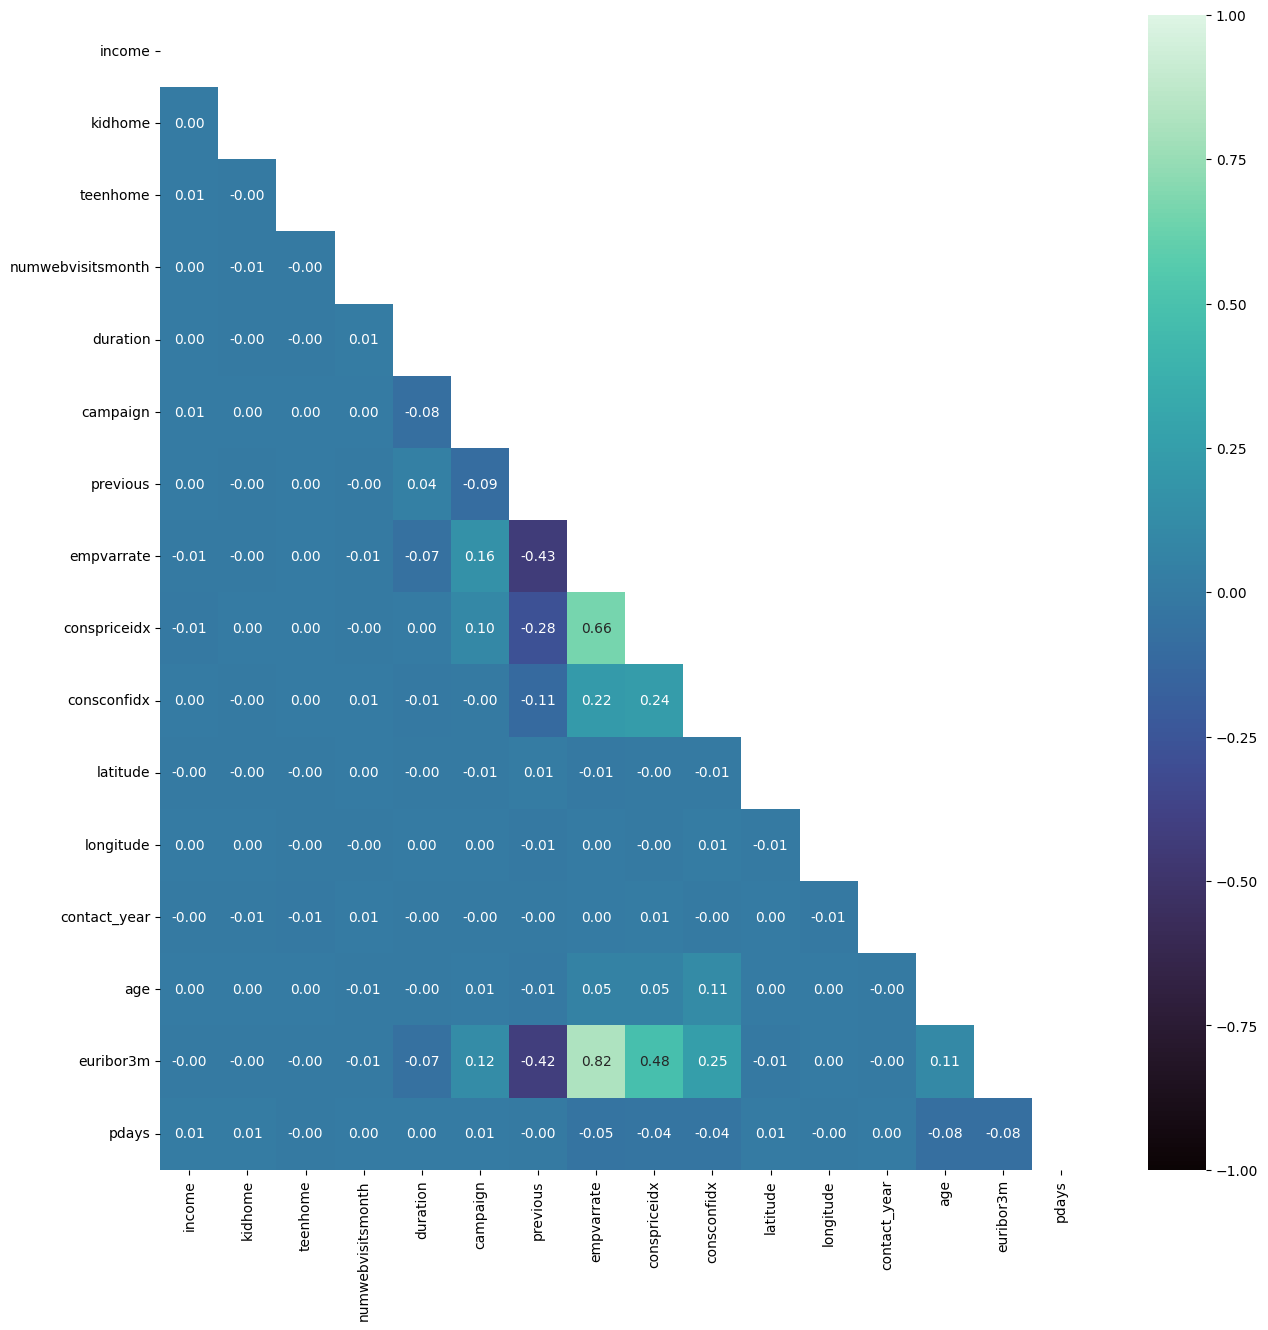

In [25]:
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

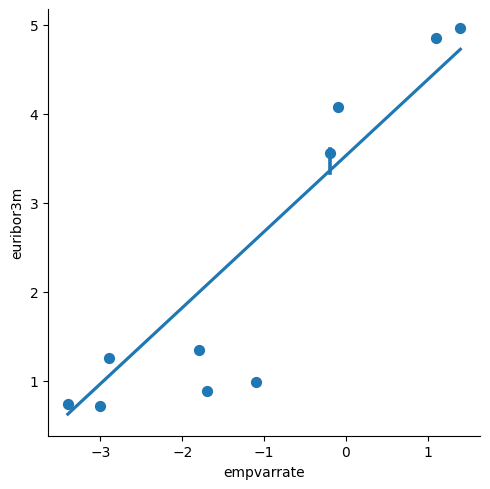

In [28]:
sns.lmplot(y="euribor3m", x="empvarrate", data=df, x_estimator=np.median)

<Axes: xlabel='age'>

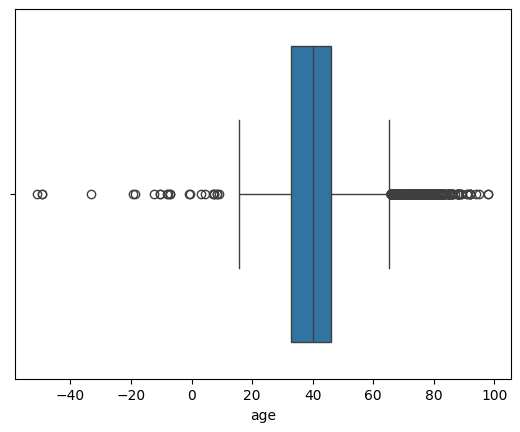

In [29]:
sns.boxplot(x="age", data=df)

In [30]:
Q1 = np.nanpercentile(df["age"], 25)
print(Q1)

33.0


In [31]:
Q3 = np.nanpercentile(df["age"], 75)
print(Q3)

46.0


In [32]:
IQR = Q3 - Q1
print(IQR)

13.0


In [33]:
salto = IQR*1.5

salto

np.float64(19.5)

In [34]:
bigote_izq = Q1 - salto
print(bigote_izq)

13.5


In [36]:
bigote_der = Q3 + salto
print(bigote_der)

65.5


In [43]:
df_sin_out = df[(df["age"]< bigote_der)&(df["age"]> bigote_izq)]

<Axes: xlabel='age'>

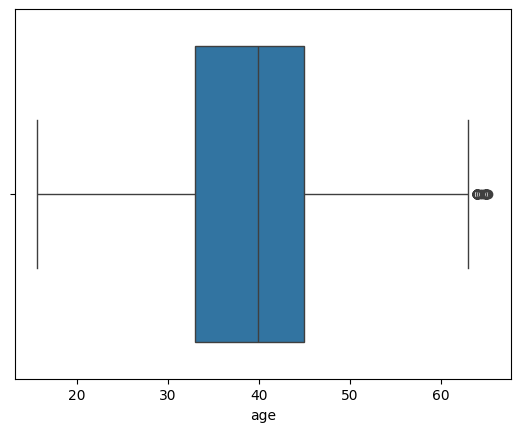

In [44]:
sns.boxplot(x="age", data=df_sin_out)

In [41]:
df_sin_out["age"].max()

np.float64(65.24679508561789)

In [42]:
df["age"].max()

np.float64(98.0)